# Exploratory (Exploracion)
Explorar los datos es una parte escencial, sobretodo si tenemos demasiadas columnas, que es util? que cosas no lo son?
Debemos de entender muy bien los datos, es posible cometer equivocaciones pero para eso es la practica, llegaras lejos :)

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [17]:
# os.path entrega funcionalidades relacionadas a paths (rutas) de ficheros

from os.path import join
ruta_csv = join("data", "hipparcos-voidmain.csv")
hipp_df = pd.read_csv(ruta_csv)


In [18]:
hipp_df.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


In [19]:
hipp_df.columns

Index(['Catalog', 'HIP', 'Proxy', 'RAhms', 'DEdms', 'Vmag', 'VarFlag',
       'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA', 'pmDE',
       'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA', 'Plx:RA',
       'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA', 'pmDE:DE',
       'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag', 'e_BTmag', 'VTmag',
       'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V', 'V-I', 'e_V-I', 'r_V-I',
       'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat', 'o_Hpmag', 'm_Hpmag', 'Hpmax',
       'HPmin', 'Period', 'HvarType', 'moreVar', 'morePhoto', 'CCDM', 'n_CCDM',
       'Nsys', 'Ncomp', 'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho',
       'e_rho', 'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
       'CPD', '(V-I)red', 'SpType', 'r_SpType'],
      dtype='object')

In [20]:
hipp_df.drop(["Catalog", "HIP", "Proxy", "RAhms", "DEdms"], axis=1, inplace=True)

In [45]:
# que columnas son objetos
# y pueden requerir tratamiento especial
df.dtypes[df.dtypes == object]

r_Vmag       object
AstroRef     object
m_BTmag      object
r_B-V        object
r_V-I        object
CombMag      object
m_Hpmag      object
HvarType     object
morePhoto    object
CCDM         object
n_CCDM       object
MultFlag     object
Source       object
Qual         object
m_HIP        object
Survey       object
Chart        object
Notes        object
BD           object
CoD          object
CPD          object
SpType       object
r_SpType     object
dtype: object

# Graficas para observar datos

### 1. Sistema de Coordenadas Astronómicas

Comenzamos observando qué porción del cielo está cubierta por la misión Hipparcos. Para ello, utilizamos los sistemas de coordenadas astronómicas:

* La ascensión recta
* La declinación

Piensa en la ascensión recta como la longitud y en la declinación como la latitud de las estrellas en el cielo con respecto a lo que los astrónomos definen como la [esfera celeste](https://en.wikipedia.org/wiki/Celestial_sphere), una esfera imaginaria en el infinito de tal manera que las estrellas a esta distancia parecen permanecer fijas en el cielo.

[Este](https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/) es un artículo de uno de nuestros colegas astrónomos. Te recomiendo encarecidamente que lo leas si eres nuevo en Astronomía.

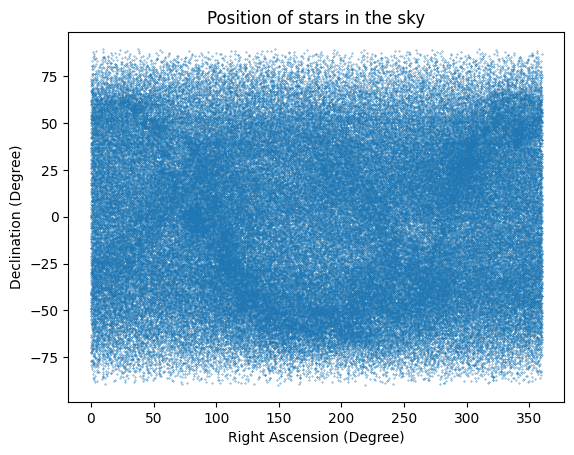

In [22]:
plt.plot(hipp_df["RAdeg"], hipp_df["DEdeg"], 'o', markersize = 0.3)

plt.xlabel("Right Ascension (Degree)")
plt.ylabel("Declination (Degree)")
plt.title ("Position of stars in the sky")
plt.show()

In [23]:
hipp_df["Vmag"].describe()

count    118217.000000
mean          8.373233
std           1.312044
min          -1.440000
25%           7.640000
50%           8.440000
75%           9.150000
max          14.080000
Name: Vmag, dtype: float64

### 2. Movimiento propio de las estrellas

Ahora visualizamos el movimiento propio de las estrellas tal como lo capturó la misión Hipparcos.

Las estrellas distantes en la [esfera celeste](https://en.wikipedia.org/wiki/Celestial_sphere) parecen permanecer fijas; sin embargo, la mayoría de las estrellas en el vecindario solar parecen moverse a través de la esfera celeste, ya que estas estrellas están más cerca. Este movimiento aparente de las estrellas con respecto a las estrellas fijas en el fondo se llama [movimiento propio](https://en.wikipedia.org/wiki/Proper_motion).

El movimiento propio se mide a lo largo de la Ascensión Recta (pmRA) y a lo largo de la Declinación (pmDE), y se mide en milisegundos de arco por año ($mas\ year^{-1}$), donde mas son milisegundos de arco, una unidad comúnmente utilizada para medir ángulos muy pequeños en el cielo.

$$1 mas = 10^{-3} arcsecond$$


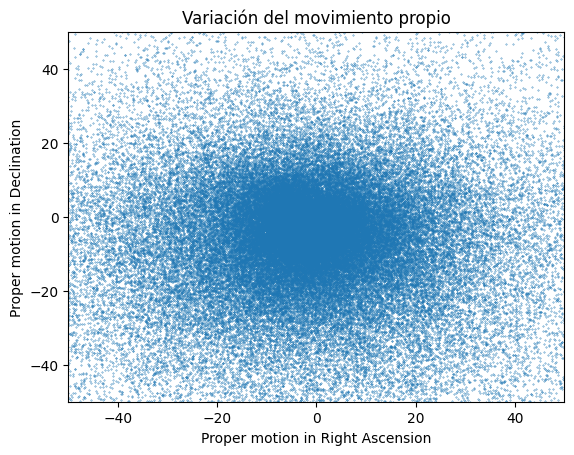

In [24]:
plt.plot(hipp_df["pmRA"], hipp_df["pmDE"], 'o', markersize = 0.3)
plt.xlabel("Proper motion in Right Ascension")
plt.ylabel("Proper motion in Declination")
plt.title ("Variación del movimiento propio")
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()

### 3. Distancias en Astronomía

Calcular distancias en Astronomía es uno de los campos de investigación más activos. Esto se debe a la inmensidad del Universo y las limitaciones técnicas de los telescopios. No discutiré en detalle la [escalera de distancias cósmicas](https://en.wikipedia.org/wiki/Cosmic_distance_ladder) en Astronomía; sin embargo, hablaré sobre uno de los métodos geométricos más antiguos y simples para determinar distancias.

El concepto de paralaje surge del hecho de que las estrellas parecen moverse con respecto a las estrellas de fondo cuando se observan desde el mismo lugar en la Tierra y con un intervalo de observación de unos seis meses, es decir, miramos una estrella y luego miramos la misma estrella cuando la Tierra está en el otro lado de su órbita. Este cambio de posición de la Tierra hace que la estrella desplace su posición formando un arco en el cielo. Este desplazamiento angular de la estrella en el cielo se llama paralaje.

Calculamos la distancia de paralaje usando trigonometría, cuyos detalles se pueden encontrar [aquí](http://https://lco.global/spacebook/distance/parallax-and-distance-measurement/).

En términos simples, la distancia en pársecs se da por:

$$d = \frac{1}{p}$$

donde p es la paralaje medida en segundos de arco.

Mirando la forma matemática de la distancia anterior, ¿podrías proponer una definición de paralaje?

Nota: Las mediciones de paralaje pueden ser altamente inexactas para distancias mayores a unos pocos kpc (kilopársecs).

Ahora utilizamos la relación distancia-paralaje para calcular las distancias a las estrellas en los datos de Hipparcos. Debemos recordar que la paralaje en el catálogo Hipparcos está en mas o milisegundos de arco (mas, ya que la unidad de paralaje es común en los estudios del cielo. ¿Podrías pensar por qué?). La inversión directa de la paralaje nos dará la distancia en kpc, y por lo tanto, las distancias obtenidas deben multiplicarse por un factor de $10^3$ para obtener la distancia en pársecs.

Para simplificar, trabajaré con kilopársecs a menos que se necesite explícitamente otra unidad.

$1kpc = 10^3 pc$


In [25]:
d = 1/hipp_df["Plx"]
d.describe() # nos entrega una estadistica

c:\Users\fbien.DESKTOP-6FMEAR7\Desktop\intro_machine_learning\env\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.179550e+05
mean              inf
std               NaN
min     -1.000000e+02
25%      1.067236e-01
50%      2.004008e-01
75%      3.584229e-01
max               inf
Name: Plx, dtype: float64

Algo no parece estar bien por varias razones.

1. Hay valores infinitos para la media y el máximo, lo que sugiere que hay "divisiones por cero" ocurriendo en el cálculo. Por lo tanto, las paralajes con valores de cero o cercanos a cero deben eliminarse del conjunto de datos para calcular distancias razonables. Las paralajes cercanas a cero corresponden a estrellas que están mucho más lejos.

2. En segundo lugar, hay un `NaN` para la desviación estándar, lo cual tampoco es correcto. Esto sugiere que hay valores faltantes para las paralajes en los conjuntos de datos. Debemos tener esto en cuenta también.

3. El mínimo para la distancia es un valor negativo, lo que indica que hay paralajes negativas en los datos de Hipparcos. Esto también debe considerarse.


In [31]:
hipp_df_par_corrected = hipp_df[hipp_df["Plx"].notna()] # NaNs

# Paralaje positivo y no cercano a 0
hipp_df_par_corrected = hipp_df_par_corrected[hipp_df_par_corrected.Plx > 0.1] 
hipp_df_par_corrected["d"] = 1/hipp_df_par_corrected["Plx"]
hipp_df_par_corrected["d"].describe()

count    113278.000000
mean          0.351714
std           0.596814
min           0.001295
25%           0.115473
50%           0.207900
75%           0.364964
max           9.090909
Name: d, dtype: float64

Las distancias obtenidas parecen tener valores razonables. La estrella más cercana está a aproximadamente 1 pársec (0.001 kpc = 1 pársec) de distancia, mientras que la estrella más lejana está a unos 10 kpc, con una mediana de aproximadamente 200 pc. Si estás familiarizado con la estadística, habrás reconocido de inmediato que la distribución no es normal, sino que está sesgada hacia la derecha.

Vamos a visualizar esto con la ayuda de un histograma a continuación.


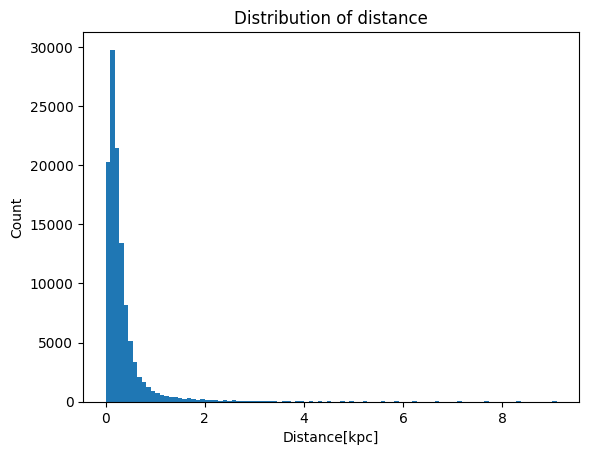

In [32]:
plt.hist(hipp_df_par_corrected["d"], bins = 100)
plt.title("Distribution of distance")
plt.xlabel("Distance[kpc]")
plt.ylabel("Count")
plt.show()

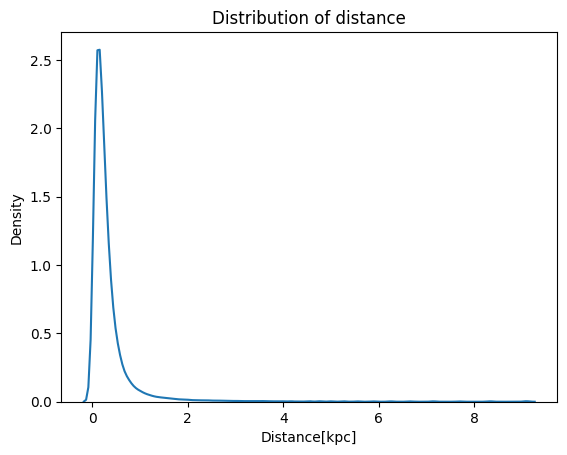

In [34]:
import seaborn as sns

sns.kdeplot(data = hipp_df_par_corrected, x = "d")
plt.title("Distribution of distance")
plt.xlabel("Distance[kpc]")
plt.ylabel("Density")
plt.show()

## Tipos Espectrales

In [35]:
def get_sptype(sptype):
    O = B = A = F = G = K = M = 0
    for element in sptype.keys():
        if element[0] == 'O':
            O = O + sptype[element]
        elif element[0] == 'B':
            B = B + sptype[element]
        elif element[0] == 'A':
            A = A + sptype[element]
        elif element[0] == 'F':
            F = F + sptype[element]
        elif element[0] == 'G':
            G = G + sptype[element]
        elif element[0] == 'K':
            K = K + sptype[element]
        elif element[0] == 'M':
            M = M + sptype[element]
    return {"O": O, "B": B, "A": A, "F": F, "G": G, "K": K, "M": M}

In [36]:
sptype = hipp_df_par_corrected["SpType"].value_counts()
sptype = sptype.to_dict()
sptype = get_sptype(sptype)
print(sptype)

{'O': 181, 'B': 9469, 'A': 18191, 'F': 25106, 'G': 22250, 'K': 30755, 'M': 4405}


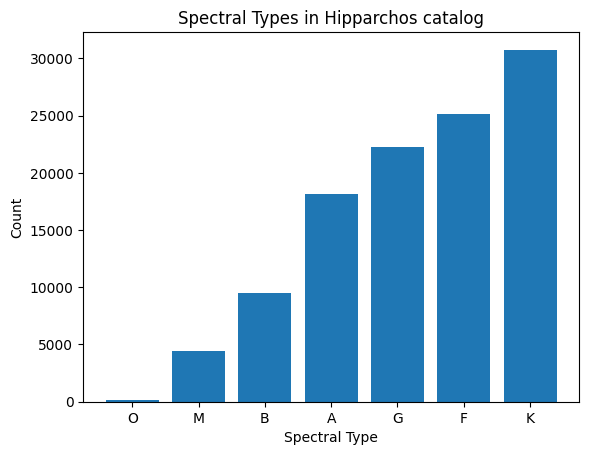

In [37]:
spectral_types = list(sptype.keys())
type_values = list(sptype.values())
data_df = pd.DataFrame({"Spectral_type": spectral_types,
                       "Type_counts": type_values})
data_df = data_df.sort_values("Type_counts")
plt.bar(data_df["Spectral_type"], data_df["Type_counts"])
plt.xlabel("Spectral Type")
plt.ylabel("Count")
plt.title ("Spectral Types in Hipparchos catalog")
plt.show()

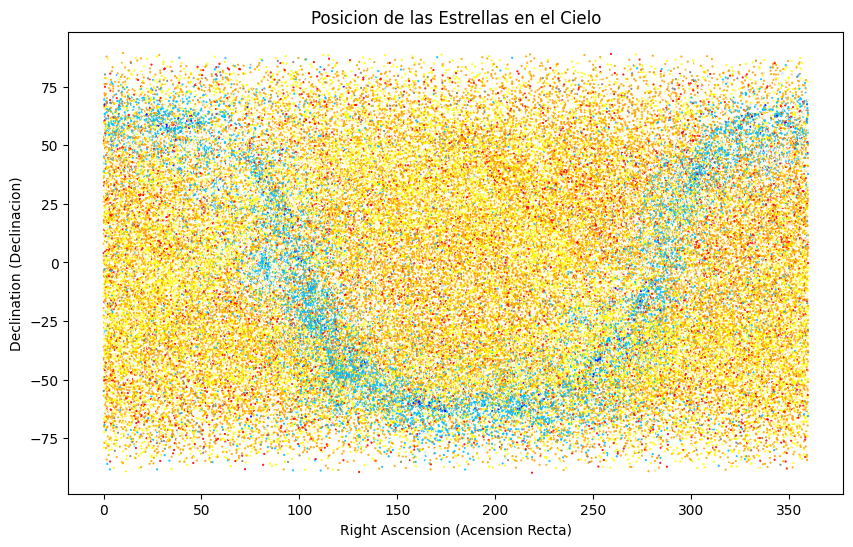

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming hipp_df has columns "RAdeg", "DEdeg", and "SpType"

# Define color map based on spectral type
color_map = {
    'O': 'blue',
    'B': 'deepskyblue',  # Blue-white
    'A': 'white',
    'F': 'lightyellow',  # Yellow-white approximation
    'G': 'yellow',
    'K': 'orange',
    'M': 'red'
}

# Map the star types to colors

colors = hipp_df_par_corrected["SpType"].str[0].map(color_map)

# Replace NaN values with a default color, such as gray
colors = colors.fillna('gray')

# Plot with colors
plt.figure(figsize=(10, 6))
plt.scatter(hipp_df_par_corrected["RAdeg"], hipp_df_par_corrected["DEdeg"], c=colors, s=0.3, marker='o')

plt.xlabel("Right Ascension (Acension Recta)")
plt.ylabel("Declination (Declinacion)")
plt.title("Posicion de las Estrellas en el Cielo")
plt.show()

In [39]:

# Convert RA and Dec to radians for 3D plotting
ra_rad = np.deg2rad(hipp_df_par_corrected["RAdeg"])
dec_rad = np.deg2rad(hipp_df_par_corrected["DEdeg"])

def plot_3d(ra_rad, dec_rad, distance, colors):
    # Convert to Cartesian coordinates
    x = distance * np.cos(dec_rad) * np.cos(ra_rad)
    y = distance * np.cos(dec_rad) * np.sin(ra_rad)
    z = distance * np.sin(dec_rad)

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

    # Different rotations for each subplot
    angles = [(30, 60), (30, 120), (30, 180)]

    for ax, angle in zip(axs, angles):
        # Scatter plot
        ax.scatter(x, y, z, c=colors, s=0.3, marker='o', alpha=0.7)
        ax.set_xlabel("X (cos(Dec) * cos(RA))")
        ax.set_ylabel("Y (cos(Dec) * sin(RA))")
        ax.set_zlabel("Z (sin(Dec))")
        ax.view_init(elev=angle[0], azim=angle[1])
        ax.set_title(f"View: Elev={angle[0]}, Azim={angle[1]}")

    # Adjust layout and show plot
    plt.tight_layout()


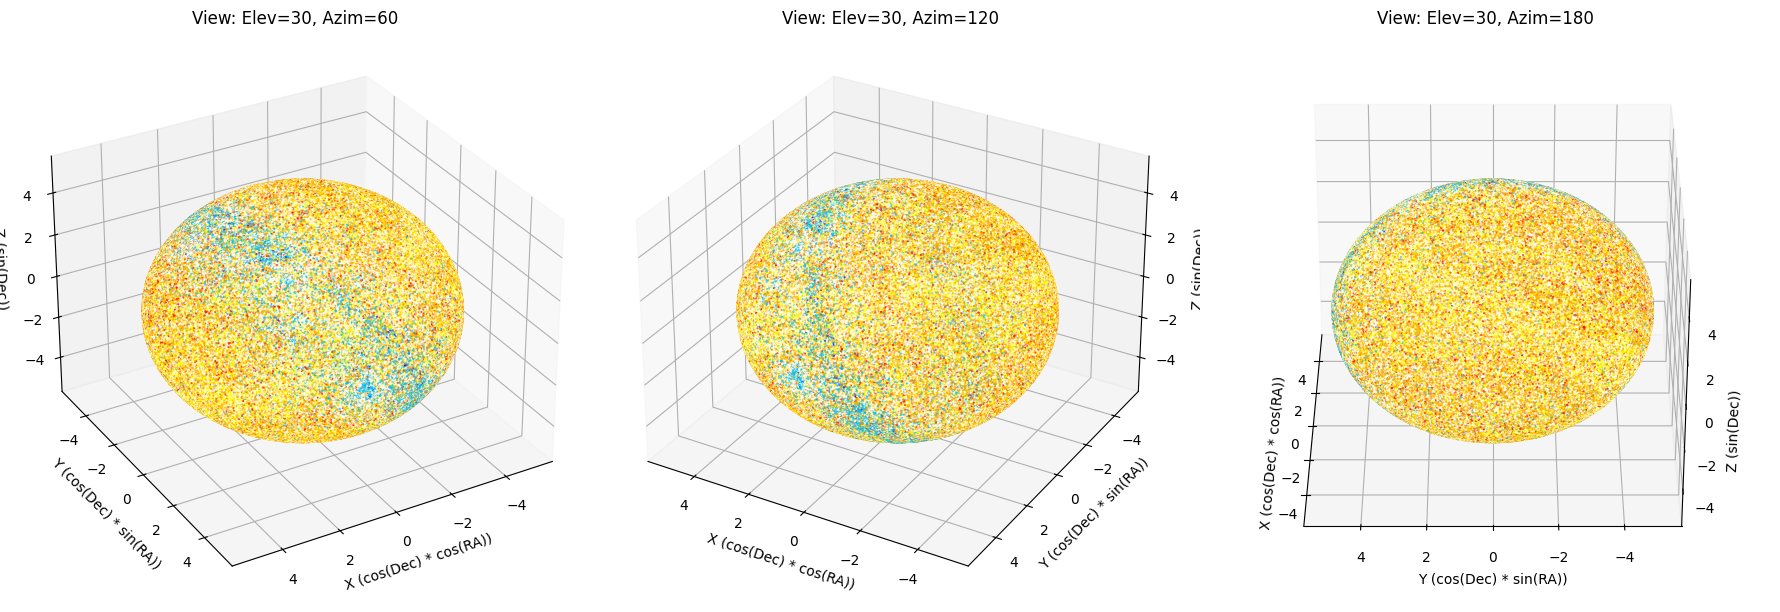

In [40]:
plot_3d(ra_rad, dec_rad, 5, colors)

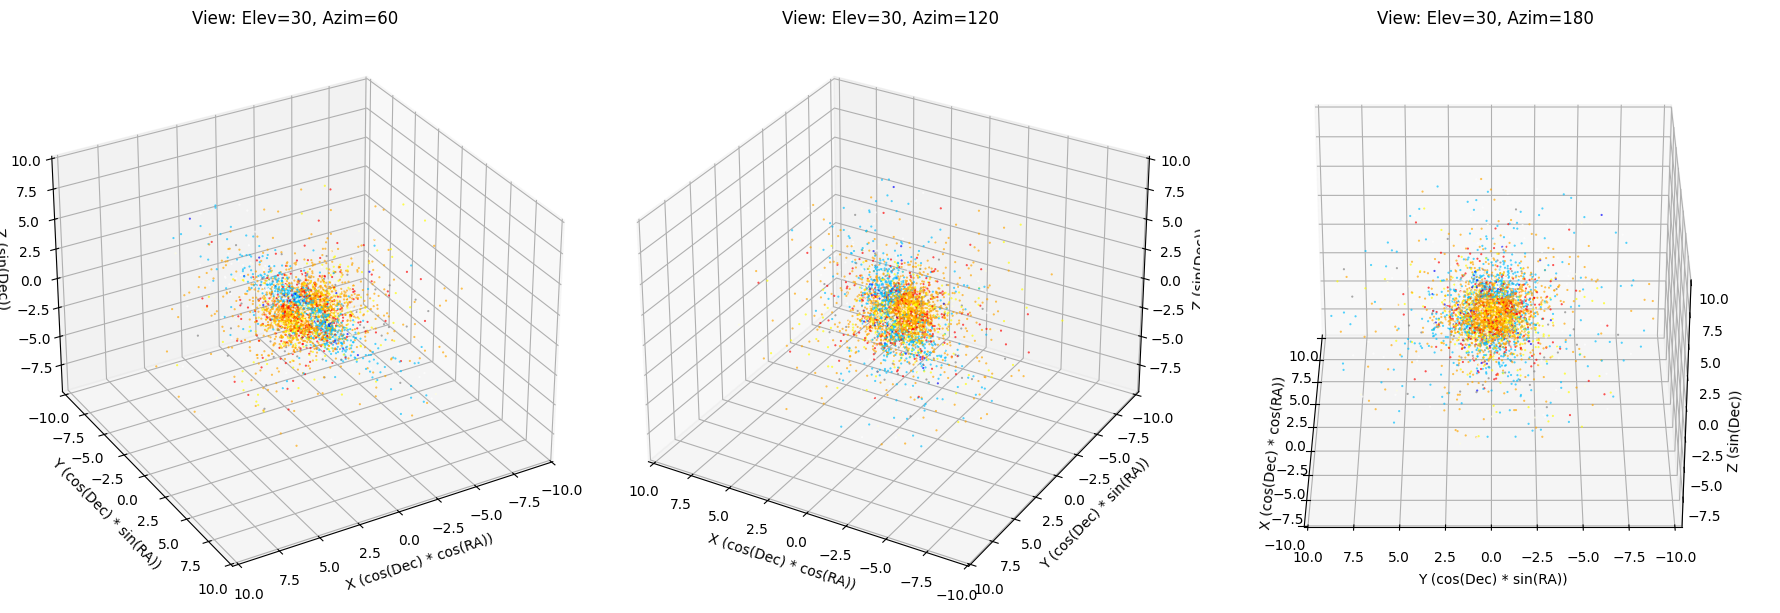

In [41]:
distance = hipp_df_par_corrected["d"]

plot_3d(ra_rad, dec_rad, distance, colors)